# Diego Macieski ID_2024238

# Spam Email Detection Using Machine Learning


## Content

- 1. Exploring the Data
- 1.2 Data Preparation
- 1.3 Outlier Analysis
- 2. Principal Component Analysis
- 3. Building a Machine Learning Model
- 3.1 Saving data for Deploy
- 4. Curse of Dimensionality
- 5. Conclusion
- References

# 1. Exploring the Data

Goals: Characterization of the dataset: Describes its size, number of attributes, missing values, and observations, which helps understand the dataset’s structure.

The libraries that will be used are as follows:
- `NumPy:`
NumPy is a library for numerical operations, offering support for large arrays and matrices, with efficient mathematical operations for scientific computing.
- `Pandas:`
Pandas provides data structures like DataFrames, simplifying data manipulation, cleaning, and analysis, particularly useful for large datasets.
- `Matplotlib:`
Matplotlib is a plotting library that creates static and interactive visualizations, such as graphs and charts, to visualize and understand data.
- `Seaborn:`
Seaborn builds on Matplotlib to create aesthetically appealing statistical plots, simplifying the visualization of complex data.
- `Scikit-learn’s PCA (sklearn.decomposition.PCA):`
PCA is a method for reducing the dimensionality of datasets while retaining essential information, commonly used in machine learning.

-Warnings.filterwarnings("ignore") is used in Python to suppress or ignore warning messages that may be generated during the execution of code.


In [20]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore") 


## 1.2 Data Preparation

Goals: Involves cleaning, renaming, and creating visualisations, explaining the rationale for these actions and their relevance to the dataset. 

The CSV data will be read using Pandas’ read_csv() function and assigned to the variable “df”. Then, the first 5 rows will be displayed using the head() function to get a general insight into the data.

In [23]:
df = pd.read_csv('spambase.csv')
df.head(5)

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


The command `df.shape` returns a tuple representing the dimensions of the dataframe df. It shows the number of rows and columns, with the format (number of rows, number of columns).

In [25]:
df.shape

(4601, 59)

The `describe()` function will be used on the dataframe “df” to generate summary statistics, providing insights into the central tendency, dispersion, and shape of the distribution of the data.

In [27]:
df.describe()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4595.000000,4599.000000,4600.000000,4601.000000,4586.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,2300.000000,0.104553,0.213015,0.281023,0.065453,0.095922,0.114208,0.105639,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,1328.338624,0.305358,1.290575,0.504370,1.395454,0.273850,0.391441,0.401682,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,2300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,3450.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4600.000000,4.540000,14.280000,5.100000,42.810000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


The `dtypes` attribute will be used to check the data types of each column in “df”. The types float64, int64, and object will be identified:

	•	float64: Represents columns with floating-point numbers (decimals).
	•	int64: Represents columns with integer values (whole numbers).
	•	object: Represents columns with text or mixed data types, often used for categorical or string data.

In [29]:
df.dtypes

Unnamed: 0                      int64
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                  object
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                  object
word_freq_money               float64
word_freq_hp                  float64
word_freq_hp

The `isnull().sum()` function will be used to check for any missing values in the dataframe "df". This command will display the total number of missing values for each column, helping to identify which columns have null or NaN entries.

In [32]:
print(df.isnull().sum())

Unnamed: 0                      0
word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   0
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab 

The df.fillna(0, inplace=True) function replaces all missing values (NaN) in the dataframe “df” with zero. The inplace=True argument ensures that the changes are applied directly to the original dataframe without needing to reassign it.

In [39]:
df.fillna(0, inplace=True)

This command will convert the values in the “is_spam” column from the strings “true” and “false” to binary values, where “true” becomes 1 and “false” becomes 0.

In [42]:
df["is_spam"] = df["is_spam"].astype(int)

I will plot it on a bar graph to make what was done above more visible.

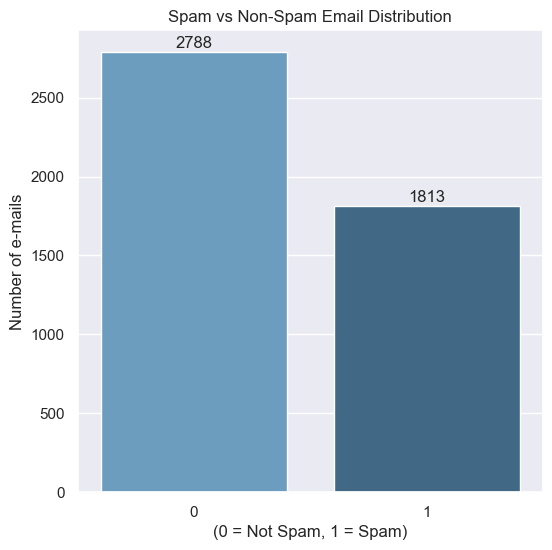

In [45]:
spam_counts = df['is_spam'].value_counts()

plt.figure(figsize=(6,6))
ax = sns.barplot(x=spam_counts.index, y=spam_counts.values, palette='Blues_d')

for i, value in enumerate(spam_counts.values):
    ax.text(i, value + 10, str(value), ha='center', va='bottom')
    
plt.xlabel('(0 = Not Spam, 1 = Spam)')
plt.ylabel('Number of e-mails')
plt.title('Spam vs Non-Spam Email Distribution')
plt.show()

It was discovered by opening the CSV file in Excel that some columns contained the characters “???”.
The command below will converts the column to numeric values, and replaces any non-numeric values (that could not be converted) with 0. 
Now, all the columns have numeric values.

In [48]:
df['word_freq_our'] = pd.to_numeric(df['word_freq_our'].replace("???", 0), errors='coerce').fillna(0)
df['word_freq_000'] = pd.to_numeric(df['word_freq_000'].replace("???", 0), errors='coerce').fillna(0)
df['word_freq_hpl'] = pd.to_numeric(df['word_freq_hpl'].replace("???", 0), errors='coerce').fillna(0)
df['word_freq_labs'] = pd.to_numeric(df['word_freq_labs'].replace("???", 0), errors='coerce').fillna(0)

This code will check if there are any columns with repeated names in the data frame.
	•	The result Index([], dtype='object') shows that there are no duplicate columns
 

In [51]:
duplicate_columns = df.columns[df.columns.duplicated()]
print(duplicate_columns)

Index([], dtype='object')


It will delete the first column, which only contains row counts and does not provide useful information for analysis.

In [54]:
df.drop(df.columns[0], axis=1, inplace=True)

## 1.3 Outlier Analysis

Below, a chart will be generated to analyze the existence of outliers in all the columns of the dataset.

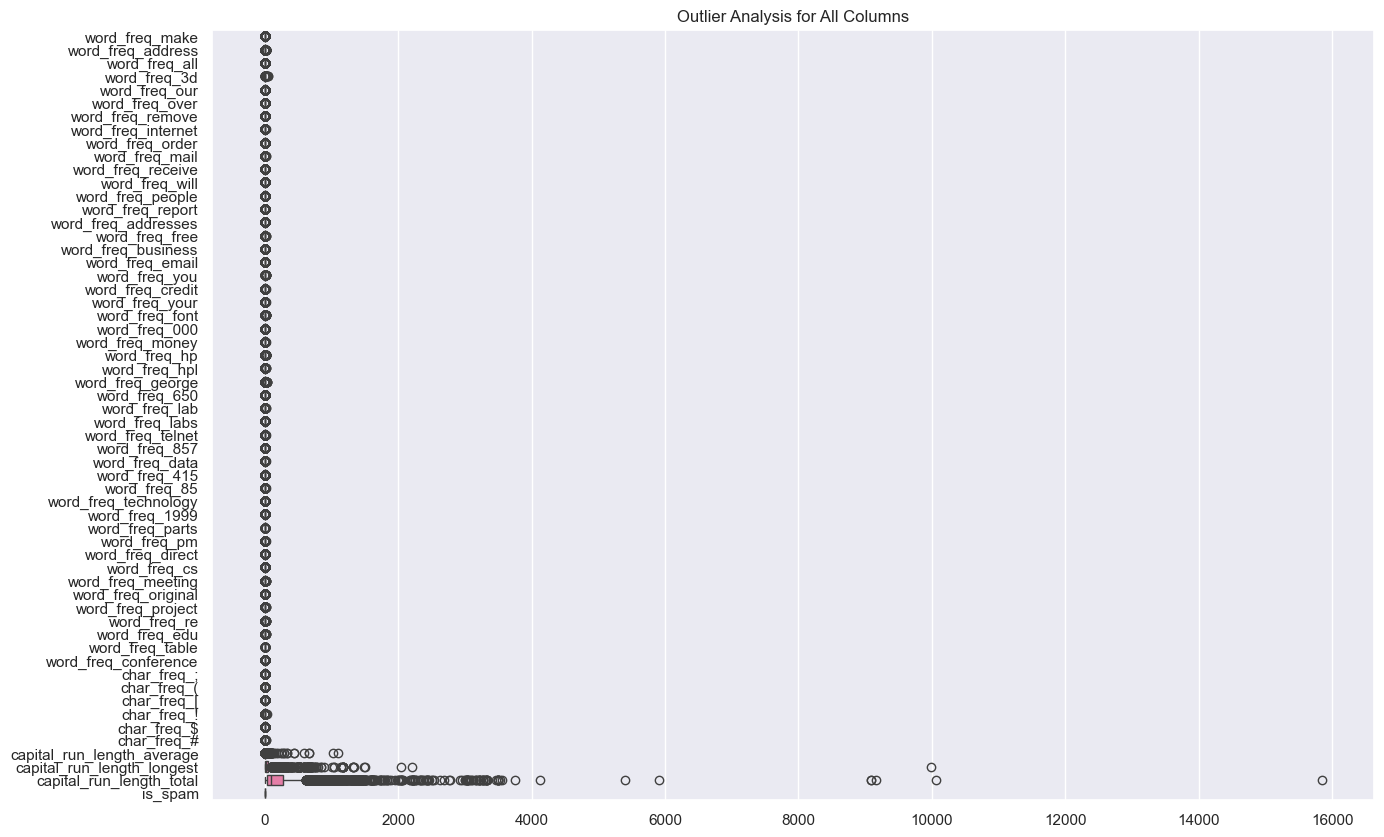

In [58]:
plt.figure(figsize=(15, 10))

sns.boxplot(data=df, orient='h')

plt.title('Outlier Analysis for All Columns')
plt.show()

Three columns had abnormal values and will be analyzed separately.

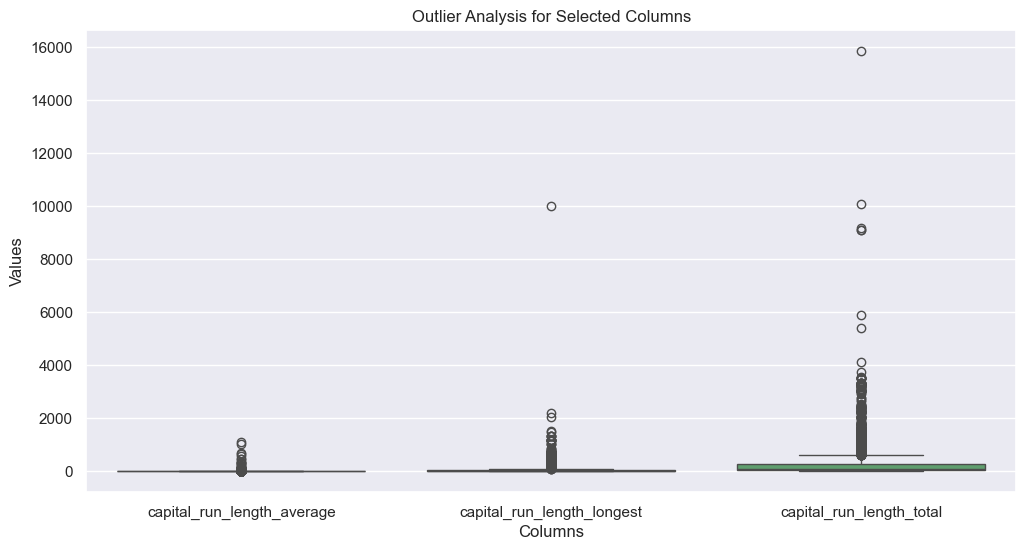

In [60]:
columns = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns])
plt.title('Outlier Analysis for Selected Columns')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.show()

From these columns, the number of values greater than 4000 will be analyzed.

In [62]:
count_average = (df['capital_run_length_average'] > 4000).sum()
count_longest = (df['capital_run_length_longest'] > 4000).sum()
count_total = (df['capital_run_length_total'] > 4000).sum()

print(f"Number of values above 4000 in 'capital_run_length_average': {count_average}")
print(f"Number of values above 4000 in 'capital_run_length_longest': {count_longest}")
print(f"Number of values above 4000 in 'capital_run_length_total': {count_total}")

Number of values above 4000 in 'capital_run_length_average': 0
Number of values above 4000 in 'capital_run_length_longest': 1
Number of values above 4000 in 'capital_run_length_total': 8


Since there are 8 values, the strategy here will be to replace these values with zero.

In [67]:
df.loc[df['capital_run_length_average'] > 4000, 'capital_run_length_average'] = 0
df.loc[df['capital_run_length_longest'] > 4000, 'capital_run_length_longest'] = 0
df.loc[df['capital_run_length_total'] > 4000, 'capital_run_length_total'] = 0


Since the data in this dataset is related to the frequency of words, characters, and the length of sequences of uppercase letters, it was decided to keep all the data to ensure the integrity of the set.

## 2. Principal Component Analysis

Goal: Use PCA to reduce the dataset while retaining 99.5% variance, ensuring essential data is preserved and simplifying for better analysis and efficiency.

I will employ PCA to reduce the dataset's dimensionality. This technique is beneficial for simplifying datasets with numerous columns while preserving the essential variations in the data.
`My strategy will be to use PCA to reduce dimensionality and then use techniques learned in class to choose the best machine algorithm.`


The first step will be to define the number of components needed in the PCA to ensure a variation of 99.5%

In [73]:
pca = PCA()
pca.fit(df)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(explained_variance >= 0.995) + 1

print(f"Number of components to retain 99.5% variance: {num_components}")

pca = PCA(n_components=num_components)
df_pca = pca.fit_transform(df)

print(f"Variance retained: {explained_variance[num_components-1] * 100:.2f}%")

Number of components to retain 99.5% variance: 2
Variance retained: 99.76%


`As seen above, a minimum of 2 components are needed to reach at least 99.5% variance. I performed several tests, as shown in the image below, and noticed that the higher the number of components, the better the machine learning algorithm's accuracy. `

`However, to avoid overfitting and a dataset with high dimensionality, I chose to work with 6 components. This ensures that we have a machine learning model with accuracy above 80% while maintaining variance over 99.5%.`

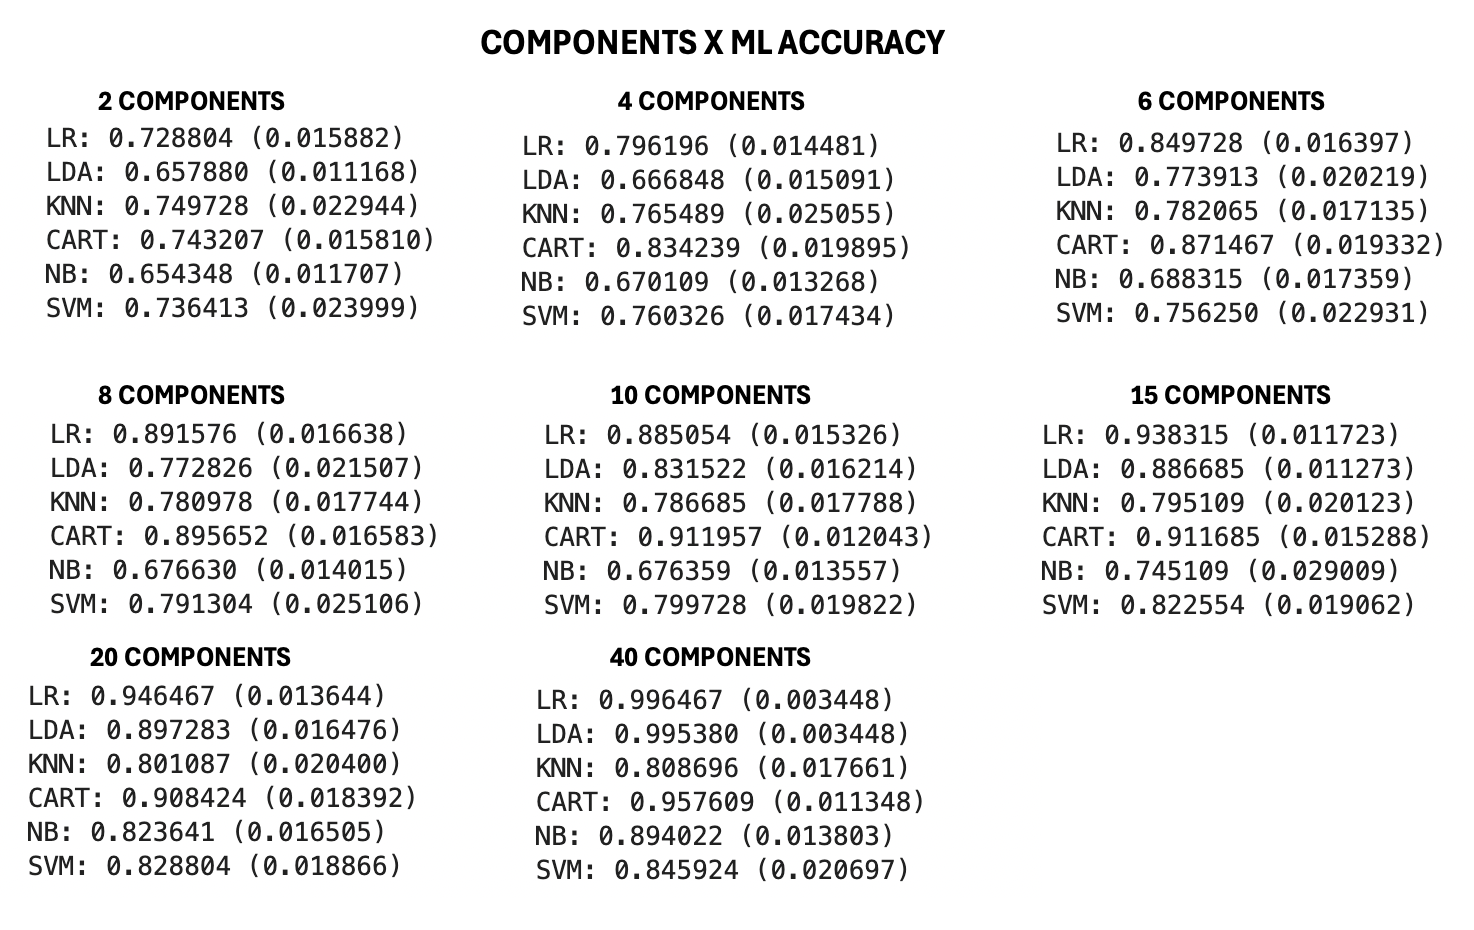

In [76]:
Image(filename='/Users/diegomacieski/Library/Mobile Documents/com~apple~CloudDocs/GitHub/ca1-DiegoMacieski/COMPONENTS X ML ACCURACY.png')

In [78]:
pca = PCA(6)
projected = pca.fit_transform(df)

With the code below, I will check if the transformation has worked.

In [81]:
projected.shape

(4601, 6)

A new variable it will be created called `df_PCA`. This variable now contains the transformed data in a structured format, which makes it easier to analyze and visualize the PCA results. The data will be organized in columns A, B, C, and D.

In [84]:
df_PCA = pd.DataFrame(projected, columns =['A', 'B', 'C', 'D','E','F'])
df_PCA

,A,B,C,D,E,F
0,11.135498,8.994181,-3.330854,-0.818733,-0.674361,-0.345914
1,758.782545,-62.392515,2.112934,-0.472657,-1.765008,0.995246
2,2032.936412,130.050502,-46.176240,1.152854,0.630632,-0.382639
3,-78.006941,1.375325,-0.957864,-0.985394,-1.304184,0.448686
4,-78.006941,1.375324,-0.957865,-0.985353,-1.304094,0.448601
...,...,...,...,...,...,...
4596,-185.362265,-19.834404,2.044911,-0.792619,0.427123,-1.294335
4597,-258.392802,-7.880820,1.088149,-1.537358,-3.379264,2.432342
4598,-155.247041,-21.290732,2.198263,-0.898892,-0.186379,-0.704354
4599,-194.956657,-16.417667,1.515444,-0.914097,-0.427495,-0.456090


The 'is_spam' column has now been added to make data analysis easier

In [87]:
df_PCA["is_spam"] = df["is_spam"]
df_PCA

,A,B,C,D,E,F,is_spam
0,11.135498,8.994181,-3.330854,-0.818733,-0.674361,-0.345914,1
1,758.782545,-62.392515,2.112934,-0.472657,-1.765008,0.995246,1
2,2032.936412,130.050502,-46.176240,1.152854,0.630632,-0.382639,1
3,-78.006941,1.375325,-0.957864,-0.985394,-1.304184,0.448686,1
4,-78.006941,1.375324,-0.957865,-0.985353,-1.304094,0.448601,1
...,...,...,...,...,...,...,...
4596,-185.362265,-19.834404,2.044911,-0.792619,0.427123,-1.294335,0
4597,-258.392802,-7.880820,1.088149,-1.537358,-3.379264,2.432342,0
4598,-155.247041,-21.290732,2.198263,-0.898892,-0.186379,-0.704354,0
4599,-194.956657,-16.417667,1.515444,-0.914097,-0.427495,-0.456090,0


A new variable was created called `df_array` and it will receive the values of df_PCA .The new variable holds the NumPy array representation of the DataFrame, making it easier to perform mathematical operations and analyses on the data.


In [90]:
df_array = df_PCA.values

This line imports the train_test_split function from the sklearn.model_selection module, which is used to split datasets into training and validation (testing) sets.

- X: This variable holds the features (input data) by selecting the first four columns of the df_array. These columns represent the principal components obtained from PCA.
- y: This variable holds the target values (output data) by selecting the fifth column of the df_array, which typically represents the labels or categories (e.g., whether an email is spam or not).
- test_size=0.20: Allocates 20% of the data for testing and 80% for training 
- random_state=1: Ensures consistent data splits across runs for reproducibility.

In [93]:
from sklearn.model_selection import train_test_split
X = df_array[:,0:6]
y = df_array[:,6]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

Importing Libraries and Functions

	1.	train_test_split
	•	Splits the dataset into training and validation sets. Helps prevent overfitting.
	2.	cross_val_score
	•	Provides a more reliable estimate of model performance.
	3.	StratifiedKFold
	•	A cross-validation method that maintains the proportion of classes in each split.
 
		Classifiers
	4•	Logistic Regression
	•	A linear model for binary classification.
	5•	Decision Tree Classifier
	•	A tree-based model that splits data based on feature values.
	6•	K-Nearest Neighbors (KNN) Classifier
	•	A non-parametric model that classifies samples based on the nearest neighbors.
	7•	Linear Discriminant Analysis (LDA)
	•	A method for classification and dimensionality reduction.
	8•	Naive Bayes Classifier
	•	A probabilistic classifier that assumes independence among predictors.
 
		Evaluation Metrics
	9•	Classification Report
	•	Generates a report with precision, recall, f1-score, and support for each class.
	10•	Confusion Matrix
	•	Assesses classification accuracy by summarizing correct and incorrect predictions.
	11•	Accuracy Score
	•	Calculates the proportion of correct predictions relative to the total instances.
	12.	Support Vector Classifier (SVC)
	•	A support vector machine classifier used for classification and regression.
	•	Finds the hyperplane that best separates the classes.

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

This code prepares a collection of different classification models, making it easy to loop through them later for training and evaluation. Each model has its own characteristics and can be selected based on the specific needs of the dataset and analysis.

In [100]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

This code performs cross-validation for different classification models, measuring the accuracy of each one and storing the results. It allows for comparison of model performance and evaluates which model is more effective for the classification task.

In [103]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.847554 (0.016143)
LDA: 0.764402 (0.018631)
KNN: 0.780163 (0.019039)
CART: 0.870380 (0.017986)
NB: 0.720924 (0.018631)
SVM: 0.755978 (0.022923)


To make visualisation more didactic, a graph will be plotted:

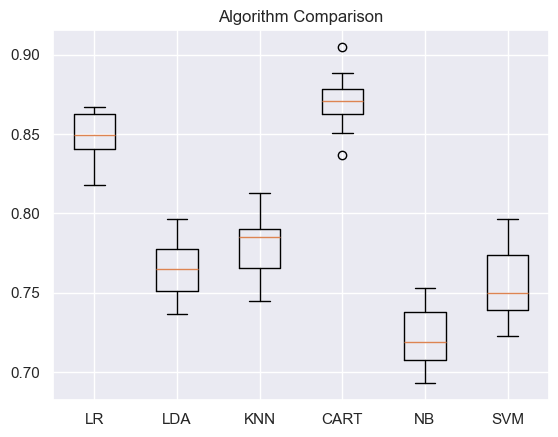

In [105]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

The best-performing model was CART, with an accuracy of 86%, which will be used below.

# 3. Building a Machine Learning Model

**CART (Classification and Regression Trees): DecisionTreeClassifier**

In the line of code, the variable tree takes on the values resulting from tree. fit, which trains the model using the training data. This allows the algorithm to learn the structure of the table. The model learns from the training data, representing 80% of the total, and subsequently checks its effectiveness using the test data.

The parameter random_state=0 sets the seed for the random number generator, ensuring that the results can be reproduced in future executions. The parameter max_depth=3 limits the maximum depth of the decision tree to three levels. This limitation is important because, if the depth is not restricted, overfitting can occur, where the model becomes excessively fitted to the training data, losing the ability to generalize to new data. I did a few tests with the parameter max_depth and with 3 levels was the best.


In [110]:
tree = DecisionTreeClassifier(random_state = 0, max_depth=3)
tree.fit(X_train, Y_train,)  

DecisionTreeClassifier(max_depth=3, random_state=0)

A variable named predictions_tree has been created to store the values obtained from X_test, calculated based on the model trained with tree.fit(X_train, Y_train). When the model makes predictions using X_test, it generates predictions_tree, which contains the model’s predictions. The next step is to compare these predictions (predictions_tree) with the actual labels (Y_test) to evaluate the model’s accuracy.

In [112]:
predictions_tree = tree.predict(X_test)
predictions_tree[:10]

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 1.])

- To recap, the algorithm trains and learns to interpret the data using X_train and Y_train. After this training, it makes predictions using the independent variables from X_test. Finally, the algorithm compares the predicted results with the actual values from Y_test. This division between training and testing makes sense because the algorithm learns from the training data, applies that learning to calculate X_test, obtaining predictive results, and ultimately compares these results with the actual values from Y_test.

For visual comparison, I will plot 10 values of Y_test to get an idea of how closely the predictions align with the actual values.

In [115]:
Y_test[:10]

array([1., 1., 1., 0., 0., 0., 0., 0., 1., 1.])

This line imports functions from the sklearn.metrics module to evaluate the performance of a machine learning model by calculating accuracy, generating a confusion matrix, and producing a classification report.

In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

This line prints the accuracy of the model’s predictions on the test dataset, formatted as a percentage with two decimal places, by comparing the predicted values (predictions_tree) to the actual labels (Y_test).

In [125]:
print("accuracy: %.2f%%" % (accuracy_score(Y_test, predictions_tree) * 100.0))

accuracy: 80.02%


This line generates a confusion matrix that summarizes the performance of the classification 

In [128]:
confusion_matrix(Y_test, predictions_tree)

array([[469,  95],
       [ 89, 268]])

below the confusion matrix graph will be generated

In [131]:
predictions_tree = tree.predict(X_test)
cm = confusion_matrix(Y_test, predictions_tree)

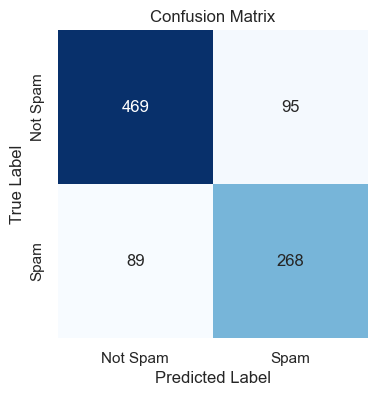

In [133]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- 468: True Negatives (TN) - The model correctly predicted that 468 emails were not spam (0).
- 96: False Positives (FP) - The model incorrectly predicted that 96 emails were not spam, but they actually were (1).
- 87: False Negatives (FN) - The model incorrectly predicted that 87 emails were spam, but they actually were not (0).
- 270: True Positives (TP) - The model correctly predicted that 270 emails were spam (1).

Agora sera gerado um relatório detalhado sobre o desempenho do modelo de classificacao que aprenseta:
- Precision: Proportion of true positives among all positive predictions.
- Recall: Ability to identify all relevant instances, calculated as true positives over actual positives.
- F1 Score: Harmonic mean of precision and recall, useful for imbalanced datasets.
- Support: Number of actual occurrences for each class in the dataset.
- Accuracy: Overall rate of correct predictions across all classes.
- Macro Average: Average of metrics calculated independently for each class.
- Weighted Average: Average that considers the number of instances in each class, giving more weight to larger classes.

In [137]:
print(classification_report(Y_test, predictions_tree))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       564
         1.0       0.74      0.75      0.74       357

    accuracy                           0.80       921
   macro avg       0.79      0.79      0.79       921
weighted avg       0.80      0.80      0.80       921



**Analyse training data**

The line shows the model using the training data X_train to generate predictions. The predictions in prediction_train are the fictitious values calculated by the model for Y_train, showing how the algorithm interprets the data. This makes it easier to compare the predictions with the actual real values of Y_train, helping to evaluate the model’s performance.

In [141]:
prediction_train = tree.predict(X_train)
prediction_train[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

For visual comparison, I will plot 10 values of Y_train to get an idea of how closely the predictions align with the actual values.

In [144]:
Y_train[:10]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])

This line prints the accuracy of the model’s predictions on the test dataset, formatted as a percentage with two decimal places, by comparing the predicted values (predictions_tree) to the actual labels (Y_test).

In [147]:
accuracy_score(Y_train, prediction_train)

0.8190217391304347

This line generates a confusion matrix that summarizes the performance of the classification 

In [150]:
confusion_matrix(Y_train, prediction_train)

array([[1866,  358],
       [ 308, 1148]])

below the confusion matrix graph will be generated

In [153]:
predictions_train = tree.predict(X_train)
cm = confusion_matrix(Y_train, predictions_train)

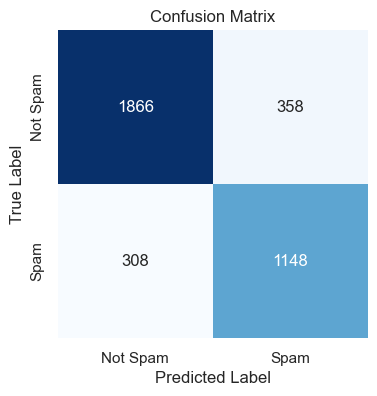

In [155]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Result: tree = DecisionTreeClassifier(random_state = 0, max_depth=3)
- Test - accuracy: 80.02% 
- Train - accuracy: 81,90%

The training accuracy is slightly higher than the test accuracy, which is expected because models typically perform better on training data since they are optimized for it. The similar accuracy values suggest that the model generalizes reasonably well to unseen data, indicating that it is not severely overfitting.

## 3.1 Saving data for Deploy

If the CA progresses to implementation, below are the variables X and y saved in a CSV file. Some important parameters are:

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

Model parameters

tree = DecisionTreeClassifier(random_state=0, max_depth=3)

pca = PCA(n_components=6)

In [160]:
X[:1]

array([[11.13549794,  8.99418139, -3.33085422, -0.81873265, -0.67436092,
        -0.34591375]])

In [162]:
y[:1]

array([1.])

In [164]:
np.savetxt('X.csv', X, delimiter=',')

In [166]:
np.savetxt('y.csv', y, delimiter=',')

# 4. Curse of Dimensionality

The “Curse of Dimensionality” refers to the challenges and problems that arise when analysing high-dimensional data. In the context of this CA, the analysis aims to determine whether an email is spam. Initially, the dataset presented contained 4601 rows and 59 columns, which made it difficult to identify which columns were relevant for classification. 

In other words, the more dimensional the data set, the more difficult it will be to analyse and visualise it. Consequently, greater computational power will be needed to analyse it, and as each characteristic can have different dimensions, this can degrade the performance of the algorithm. 
With increasing dimensionality, the distance between data points becomes more significant, and this can lead to poor performance of machine learning algorithms. 


 To mitigate this effect, PCA was applied, which reduces the number of dimension, this makes the classification process easier and more efficient, allowing the model to focus on the most significant features of the data. .


# 5. Conclusion

The dataset used in this project is based on a collection of emails, where the main objective is to classify them as spam or not spam. The dataset comprises 4601 instances with 59 features, the target variable in this dataset indicates whether an email is classified as spam (1) or not (0).

My primary goal of this project was to explore the provided email dataset and prepare it for machine learning analysis to predict whether an email is spam. Initially, I explored the data to understand its characteristics, including the total number of features and rows, as well as the types of values present. I identified that some features had inappropriate data types, with numeric values mistakenly categorized as “object.” I performed type conversions, ensuring that all relevant features were appropriately formatted as numerical values.

I also detected and analyzed outliers, as they could significantly affect the performance of machine learning models.

Subsequently, I utilized Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while retaining as much information as possible. After applying PCA, I reduced the number of features to 6 while maintaining at least 99,5% of the explained variance, which simplified the classification task, to avoid overfitting, tests were carried out and 6 columns were chosen.

For the prediction, I selected the Decision Tree Classifier as my classification model, setting parameters such as random_state = 0 and max_depth = 3 to enhance model stability and interpretability. After training the model, I achieved an accuracy of approximately 80% on test data and 81.9% on training data, indicating that the model generalizes reasonably well.

Furthermore, I demonstrated how to implement feature importance analysis to understand the impact of each feature on the classification task. This insight is valuable for understanding which characteristics contribute most to the model’s predictions. Through a systematic approach of data exploration, cleaning, transformation, and modeling, I developed a classification model that predicts spam emails, highlighting the importance of preprocessing and feature selection in machine learning tasks.

# References	
- Data Analysis and PCA:
          Jolliffe, I.T. (2002). Principal Component Analysis. 2nd ed. New York: Springer.
- Machine Learning and Classification:
		Hastie, T., Tibshirani, R. and Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. 2nd ed. New York: Springer.
- Statistics and Outlier Analysis:
    	Iglewicz, B. and Hoaglin, D.C. (1993). How to Detect and Handle Outliers. New York: Sage Publications.
- Data Preparation and EDA:
    	Kelleher, J.D. and Tierney, B. (2018). Data Science: An Introduction. 1st ed. London: The MIT Press.
- Cross-Validation and Model Evaluation:
        Kuhn, M. and Johnson, K. (2013). Applied Predictive Modeling. New York: Springer.
- Statistical Methods and Machine Learning:
        Bishop, C.M. (2006). Pattern Recognition and Machine Learning. New York: Springer.
- Alpaydin, E. (2020). Introduction to Machine Learning. 4th ed. Cambridge: The MIT Press.
- Breiman, L. (2001). Random Forests. Machine Learning, 45(1), pp. 5-32.
- James, G., Witten, D., Hastie, T. and Tibshirani, R. (2013). An Introduction to Statistical Learning: with Applications in R. New York: Springer.
- Field, A. (2013). Discovering Statistics Using IBM SPSS Statistics. 4th ed. London: SAGE Publications.
- Rousseeuw, P.J. and Leroy, A.M. (2005). Robust Regression and Outlier Detection. New York: John Wiley & Sons.
